In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datasets import load_dataset


# Loading Dataset

data_set = load_dataset('lukebarousse/data_jobs')
df = data_set['train'].to_pandas()

#Data Clean Up
df.job_posted_date = pd.to_datetime(df.job_posted_date)

In [ ]:
filtered_df = df[df['salary_year_avg'].notna()].copy()
filtered_df

def projected_salary(salary):
    return salary*1.03

filtered_df['salary_year_inflated'] = filtered_df['salary_year_avg'].apply(projected_salary)

filtered_df[['salary_year_avg','salary_year_inflated']]

In [ ]:
def projected_salary(salary):
   if "Senior" in salary['job_title_short']:
    return salary['salary_year_avg']*1.05
   else: 
    return salary['salary_year_avg']*1.03
  

filtered_df['salary_year_inflated'] = filtered_df.apply(projected_salary,axis=1)

filtered_df[['job_title_short','salary_year_avg','salary_year_inflated']]

In [ ]:
filtered_df_senior = filtered_df[filtered_df['job_title_short'].str.contains('senior', case=False, na=False)]
filtered_df_senior

In [27]:
type(df['job_skills'][1])


str

In [32]:
import ast 

type(ast.literal_eval(df['job_skills'][1]))


list

In [35]:
#conver job_skill column   to list
def clean_li (skill_li):
    if pd.notna(skill_li):
        return ast.literal_eval(skill_li)


df['job_skills'] = df['job_skills'].apply(clean_li)

In [42]:
df[['job_title_short','job_skills']]

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."
...,...,...
785736,Software Engineer,"[bash, python, perl, linux, unix, kubernetes, ..."
785737,Data Analyst,"[sas, sas, sql, excel]"
785738,Business Analyst,"[powerpoint, excel]"
785739,Data Engineer,"[python, go, nosql, sql, mongo, shell, mysql, ..."


In [47]:
df_exploded = df.explode('job_skills')

<Axes: xlabel='job_skills'>

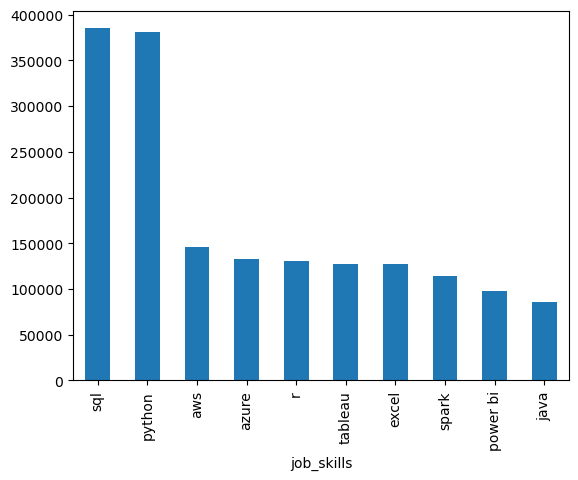

In [50]:
df_exploded['job_skills'].value_counts().head(10).plot(kind='bar') 

In [53]:
skill_count = df_exploded.groupby(['job_title_short','job_skills']).size()

type(skill_count)

pandas.core.series.Series

In [56]:
df_skill_count =skill_count.reset_index(name = 'skill_count')



,job_title_short,job_skills,skill_count
0,Business Analyst,airflow,318
1,Business Analyst,airtable,17
2,Business Analyst,alteryx,1078
3,Business Analyst,angular,87
4,Business Analyst,ansible,120
...,...,...,...
2251,Software Engineer,wrike,4
2252,Software Engineer,wsl,13
2253,Software Engineer,xamarin,35
2254,Software Engineer,yarn,145


In [57]:
df_skill_count =df_skill_count.sort_values(by='skill_count',ascending=False)

df_skill_count

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


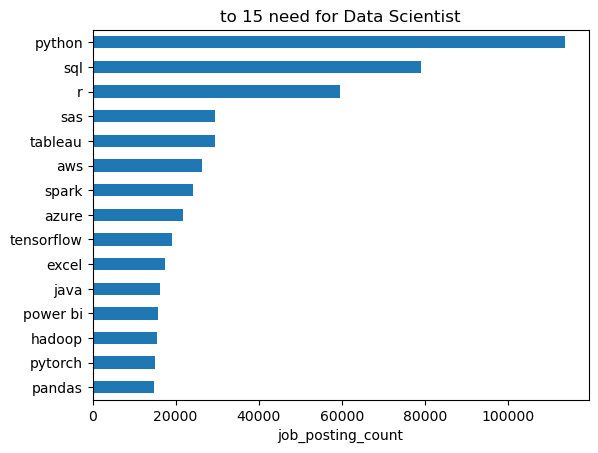

In [65]:
job_title ='Data Scientist'

top_skills = 15

df_skill_final = df_skill_count[df_skill_count['job_title_short'] == job_title].head(top_skills)

df_skill_final.plot(kind='barh', x='job_skills',y='skill_count')
plt.gca().invert_yaxis()
plt.title(f'to {top_skills} need for {job_title}')
plt.xlabel('job_posting_count')
plt.ylabel('')
plt.legend().set_visible(False)
plt.show() 

